# Table of contents
1. [Introduction](#Tarea1)
2. [Some paragraph](#paragraph1)
    1. [Sub paragraph](#subparagraph1)
3. [Another paragraph](#paragraph2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use("seaborn")
from pylab import rcParams
from icecream import ic


plt.rcParams["figure.dpi"] = 100
np.set_printoptions(formatter={"float": "{:0.15}".format})

# Tarea 1 <a name="Tarea1"></a>

Compare Value:

In [2]:
sumSeries_Def = np.divide(np.power(np.pi, 4), 90)
sumSeries_Def

1.082323233711138

### c) SumSeriesA:

In [33]:
def sumSeriesA(n):
    all_val = []
    sum = 0
    for i in range(1, n+1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

sum_a, all_val = sumSeriesA(100)

SumSeriesA implemented with numpy

In [4]:
def sumSeriesA_opt(n):
    all_val = np.array([np.divide(1, np.power(i,4)) for i in range(1,n+1)], dtype=np.float64)
    return np.sum(all_val), all_val

sum_a_opt, all_val_opt = sumSeriesA_opt(100)

### d) SumSeriesD:

In [5]:
def sumSeriesD(n):
    sum = 0
    all_val = []
    for i in range(n, 0, -1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

sum_d, all_val_d = sumSeriesD(100)

SumSeriesD implemented with numpy:

In [6]:
def sumSeriesD_opt(n):
    all_val = np.array([np.divide(1, np.power(i,4)) for i in range(n,0,-1)], dtype=np.float64)
    return np.sum(all_val), all_val

sum_d_opt, all_val_d_opt = sumSeriesD_opt(100)

### e) SumSeries function to compare outcomes. Here we compare to the compare value defined at the start to see the deviation.

In [8]:
def sumSeries(n):
    out_a = sumSeriesA(n)[0]
    out_d = sumSeriesD(n)[0]
    comp_a = sumSeries_Def - out_a
    comp_d = sumSeries_Def - out_d
    return comp_a, comp_d

comp_a, comp_d = sumSeries(100)

SumSeries function of numpy versions

In [9]:
def sumSeries_opt(n):
    return sumSeries_Def - sumSeriesA_opt(n)[0], sumSeries_Def - sumSeriesD_opt(n)[0]

comp_a_opt, comp_d_opt = sumSeries_opt(100)

Comparison of value development in ascending and descending calculation

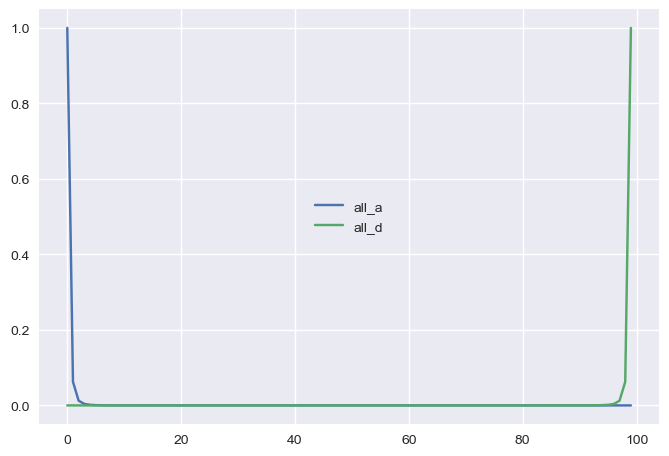

In [10]:
out_a, all_a = sumSeriesA(100)
out_d, all_d = sumSeriesD(100)

plt.plot(all_a, label = "all_a")
plt.plot(all_d, label = "all_d")
plt.legend(loc='center')
plt.show()

### a) + b) Answer

The associative property is not fulfilled, because at some point the difference in "size range" of the number is too big, hence there is a round-off error. We suspect that for the ascending order this is worse, as this algorithm starts with the biggest number and very quickly reaches numbers that are to different in size range, hence starting to experience round-off errors. For descending order this should be a little better, because it first sums up the small numbers and arrives at the biggest numbers at the end, only being subject to a few round-off errors.

Calculate difference in deviation from compare value between ascending and descending calculation

In [11]:
#calculate differences to sumseries_Def
iterations = 2000
differences_a = []
differences_d = []
comp_differences = []
for i in range (10, iterations):
    difference_a, difference_d = sumSeries(i)
    differences_a.append(difference_a)
    differences_d.append(difference_d)
    comp_differences.append(difference_d - difference_a)

In [36]:
#calculate differences to sumseries_Def based on numpy implementation
iterations = 2000
difference_a_opt_arr = np.array([], dtype=np.float64)
difference_d_opt_arr = np.array([], dtype=np.float64)
comp_difference_opt_arr = np.array([], dtype=np.float64)
for i in range(10,iterations):
    difference_a_opt, difference_d_opt = sumSeries_opt(i)
    difference_a_opt_arr = np.append(difference_a_opt_arr, difference_a_opt)
    difference_d_opt_arr = np.append(difference_a_opt_arr, difference_d_opt)
    comp_difference_opt_arr = np.append(comp_difference_opt_arr, difference_d_opt - difference_a_opt)

Show difference to actual number depending on n

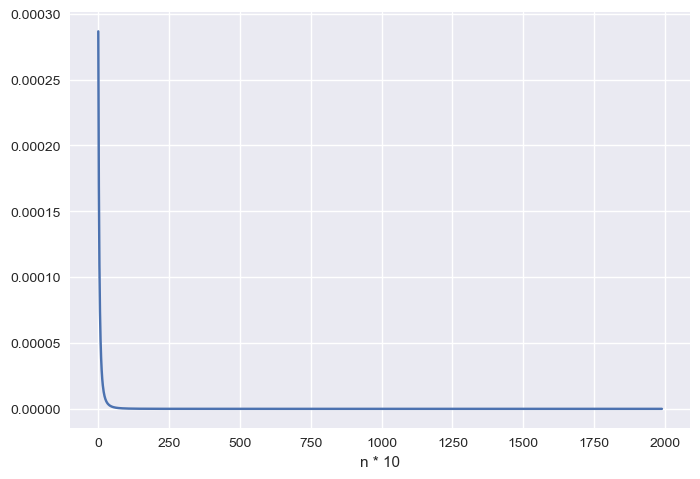

In [13]:
dif_a = plt.plot(differences_a)
plt.xlabel("n * 10")
plt.show(dif_a)

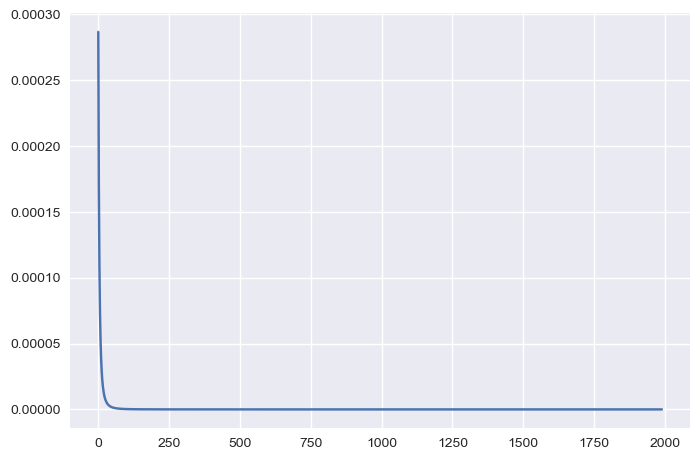

In [15]:
dif_d = plt.plot(differences_d)
plt.show(dif_d)

### f) Print values, for which SumSeriesA and SumSeriesD are not equal

We see a deviation in results from n=13 on. This equates to a difference in the 16th digit after the comma. Here we reach the amount of digits the algorithm can use without round-off error, thus creating errors from this n forwards. 

In [17]:
counter = 0
for i in range(0,100):
    a, d = sumSeries(i)
    #print(a - d)
    if a != d:
       print("Iteration:", i)
       counter += 1
print(counter)

Iteration: 13
Iteration: 22
Iteration: 33
Iteration: 35
Iteration: 36
Iteration: 40
Iteration: 41
Iteration: 48
Iteration: 49
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 66
Iteration: 67
Iteration: 69
Iteration: 75
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
42


Plot SumSeriesD - SumSeriesA


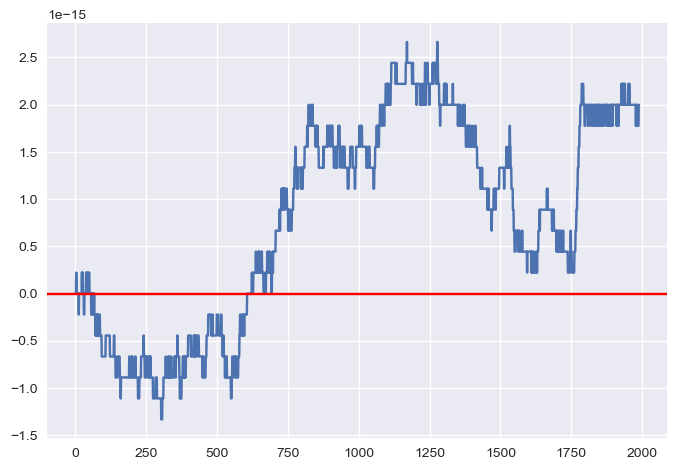

In [22]:
dif_comp = plt.plot(comp_differences)
plt.axhline(y=0, color="r", linestyle="-")

plt.show(dif_comp)

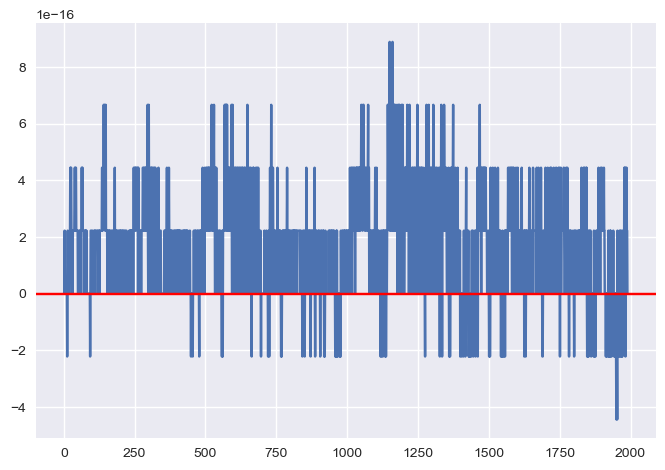

In [23]:
# Numpy array difference

dif_comp_opt = plt.plot(comp_difference_opt_arr)
plt.axhline(y=0, color="r", linestyle="-")

plt.show(dif_comp_opt)

# Tarea 2

### b) define functions

In [24]:
def quadratic1(a, b, c):
    x1 = np.divide(-b - np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    x2 = np.divide(-b + np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    return x1, x2 

def quadratic2(a, b, c):
    x1 = np.divide(2*c, -b + np.sqrt(np.power(b, 2) -4*a*c))
    x2 = np.divide(2*c, -b - np.sqrt(np.power(b, 2) -4*a*c))
    return x1, x2

def quadratic3(a, b, c):
    q = -1/2* (b + np.sign(b)*np.sqrt(np.power(b, 2)- 4*a*c))
    x1 = np.divide(q, a)
    x2 = np.divide(c, q)
    return x1, x2

### a) show equivalence

In [25]:
def show_equivalence(a, b, c):
    out1_1, out1_2 = quadratic1(a, b, c)
    out2_1, out2_2 = quadratic2(a, b, c)
    out3_1, out3_2 = quadratic3(a, b, c)

    #print('{0:.20f}'.format(out1_1))
    print(out1_1, out1_2)
    print(out2_1, out2_2)
    print(out3_1, out3_2)


In [26]:
show_equivalence(1, 5, 6)

-3.0 -2.0
-3.0 -2.0
-3.0 -2.0


### c) + d) Find examples where outputs are different

Example 1

In [27]:
a, b, c = 2, 4, -5

In [28]:
show_equivalence(a, b, c)

-2.8708286933869704 0.8708286933869707
-2.870828693386971 0.8708286933869708
-2.8708286933869704 0.8708286933869708


Example 2

In [29]:
a, b, c = 3, 0 , -9

In [30]:
show_equivalence(a, b, c)

-1.7320508075688774 1.7320508075688774
-1.7320508075688772 1.7320508075688772
-0.0 inf


/var/folders/gx/rkm0l2cx2nj7pjk5321pfqb00000gn/T/ipykernel_21098/2395113372.py:14: RuntimeWarning: divide by zero encountered in true_divide
  x2 = np.divide(c, q)


Division requires iterative subtraction that cannot be performed simultaneously so it takes longer. In fact, some Floating Point units speed up division by performing a reciprocal approximation and multiplying by that. It isn't quite as accurate but is somewhat faster. As we show here from the mathematical point of view we do the same operation but the results are different because the reason above.
Here we have also the fact, that in the quadratic1 function we divide the bigger number range by a whole number, in the quadratic2 function it´s the other way round. This is also causing differences in the outcome.

The correct solution is thus quadratic3 (provided, we do not feature b = 0). The sign function limits the upper range of b, as it makes sure that b and the square root have the same sign. Therefore it makes calculation more precise, limiting out of range errors.

In [35]:
#printing individual parts of the equation to compare their ranges

#quadratic1
x1 = np.divide(-b - np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
x2 = np.divide(-b + np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
ic(-b+ np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
ic(x2)

#quadratic2
x1 = np.divide(2*c, -b + np.sqrt(np.power(b, 2) -4*a*c))
x2 = np.divide(2*c, -b - np.sqrt(np.power(b, 2) -4*a*c))
ic(2*c, -b- np.sqrt(np.power(b, 2) -4*a*c))
ic(x2)

ic| -b+ np.sqrt(np.power(b, 2) - 4*a*c): 10.392304845413264, 2*a: 6
ic| x2: 1.7320508075688774
ic| 2*c: -18, -b- np.sqrt(np.power(b, 2) -4*a*c): -10.392304845413264
ic| x2: 1.7320508075688772


1.7320508075688772

quadratic3 puts out infinite, because for c / q we divide by zero, which is not possible (or results in "inf" for python)

In [32]:
#quadratic3:
ic(-1/2* (b + np.sign(b)*np.sqrt(np.power(b, 2)- 4*a*c)))

ic| -1/2* (b + np.sign(b)*np.sqrt(np.power(b, 2)- 4*a*c)): -0.0


-0.0